# ISyE6416 Homework2

## Problem2 Logistic regression
### (b) 
Use data logit-x.dat and logit-y.dat, which contain the predictors xi ∈ $R^2$ and response $y_{i} ∈ {0, 1}$ respectively for logistic regression problem.


Implement Newton’s method for optimizing $l(a,b)$ and apply it to fit a logistic regression model to the data. Initialize Newton’s method with a = 0, b = 0. Plot the value of the log likelihood function versus iterations. What are the coefficients a and b from your fit?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data
df1 = pd.read_fwf("logit-x.dat", header = None)
df2 = pd.read_table("logit-y.dat", header = None)

In [3]:
df1

,0,1
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315
...,...,...
94,4.774854,0.099415
95,5.827485,-0.690058
96,2.289474,1.970760
97,2.494152,1.415205


In [4]:
df2
df2.rename(columns = {0:"Y"}, inplace = True)
df2

,Y
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
94,1.0
95,1.0
96,1.0
97,1.0


In [5]:
# combined tables
combined = pd.concat([df2, df1], axis=1, sort=False)
combined

,Y,0,1
0,0.0,1.343250,-1.331148
1,0.0,1.820553,-0.634668
2,0.0,0.986321,-1.888576
3,0.0,1.944373,-1.635452
4,0.0,0.976734,-1.353315
...,...,...,...
94,1.0,4.774854,0.099415
95,1.0,5.827485,-0.690058
96,1.0,2.289474,1.970760
97,1.0,2.494152,1.415205


In [6]:
# change column names
combined.rename(columns={ 0:"x1",1: "x2"}, inplace = True)
combined

,Y,x1,x2
0,0.0,1.343250,-1.331148
1,0.0,1.820553,-0.634668
2,0.0,0.986321,-1.888576
3,0.0,1.944373,-1.635452
4,0.0,0.976734,-1.353315
...,...,...,...
94,1.0,4.774854,0.099415
95,1.0,5.827485,-0.690058
96,1.0,2.289474,1.970760
97,1.0,2.494152,1.415205


In [7]:
combined.shape

(99, 3)

In [8]:
#define Newton method Preparation
def sigmoid(a_1, a_2, b, x_1, x_2):
    z = (a_1 * x_1 + a_2 * x_2 + b).astype("float_")                                              
    return 1.0 / (1.0 + np.exp(-z))  
def logLikelihood(x_1, x_2, y_prob, a_1, a_2, b):
        return np.sum(y_prob * np.log(sigmoid(a_1, a_2, b, x_1, x_2)) 
                      + (1 - y_prob) * np.log(1 - sigmoid(a_1, a_2, b, x_1, x_2))) 
def gradient(x_1, x_2, y, a_1, a_2, b):                                                         
    sigmoid_probs = sigmoid(a_1, a_2, b, x_1, x_2)                                        
    return np.array([[np.sum((y - sigmoid_probs) * x_1),
                      np.sum((y - sigmoid_probs) * x_2),
                     np.sum((y - sigmoid_probs) * 1)]])  
def Hessian(x_1, x_2, y, a_1, a_2, b):
    sigmoid_probs = sigmoid(a_1, a_2, b, x_1, x_2)                                        
    d11 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x_1 * x_1)
    d22 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x_2 * x_2)                  
    d33 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * 1 * 1)      
    d12 = d21 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x_1 * x_2)
    d13 = d31 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x_1 * 1)
    d23 = d32 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * 1 * x_2)
    H = np.array([[d11, d12, d13], [d21, d22, d23], [d31, d32, d33]])                                           
    return H

In [9]:
#define Newton method
def newtons_method(x_1, x_2, y, s):                                                             
    """
    :param x_1 (np.array(float)): Vector of independent variables
    :param x_2 
    :param y (np.array(boolean)): Response Variable(0 or 1)
    :param s: step-size
    :returns: np.array of logreg's parameters after convergence, [a_1, a_2, b]
    """

    # Initialize log_likelihood & parameters                                                                   
    a_1 = 0                                                                     
    a_2 = 0
    b = 0 # The intercept term
    Δl = np.Infinity                                                                
    l = logLikelihood(x_1, x_2, y, a_1, a_2, b)                                                                 
    # Convergence Conditions                                                        
    δ = .0000000001                                                                                                                            
    i = 0  #iteration 
    iteration = []
    likelihoodfunction = []
    while abs(Δl) > δ:                                       
        iteration.append(i)
        i += 1
        g = gradient(x_1, x_2, y, a_1, a_2, b)                                                   
        hess = Hessian(x_1, x_2, y, a_1, a_2, b)                                                
        H_inv = np.linalg.inv(hess)                                                 
        # @ is syntactic sugar for np.dot(H_inv, g.T) / .T means transpose of vector(or matrix)
        Δ = s * H_inv @ g.T                                                             
        Δa_1 = Δ[0][0]                                                              
        Δa_2 = Δ[1][0]
        Δb = Δ[2][0]
                                                                                    
        # Perform our update step                                                    
        a_1 += Δa_1                                                                 
        a_2 += Δa_2
        b += Δb
                                                                                    
        # Update the log-likelihood at each iteration 
        likelihoodfunction.append(l)
        l_new = logLikelihood(x_1, x_2, y, a_1, a_2, b)                                                      
        Δl = l - l_new                                                           
        l = l_new
    print("Iteration Times:", i)
    iteration = np.asarray(iteration)
    likelihoodfunction = np.asarray(likelihoodfunction)
    plt.plot(iteration, likelihoodfunction, 'bo', linestyle='dashed')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Likelihood Function', fontsize=16)
    plt.title("Iteration VS. Likelihood Function", fontsize = 20)
    plt.show()
    return np.array([a_1, a_2, b])                                       

In [10]:
y = combined.iloc[:,0]
x_1 = combined.iloc[:,1]
x_2 = combined.iloc[:,2]

Iteration Times: 1209


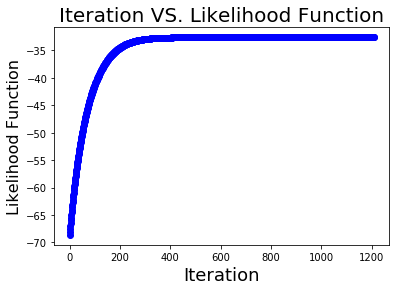

array([ 0.76035875,  1.17192489, -2.62046738])

In [11]:
newtons_method(x_1, x_2, y, 0.01)

Iteration Times: 1131


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


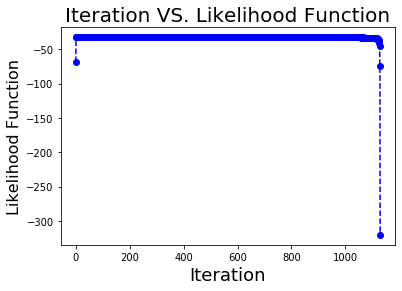

array([ 4.82976424e+07, -4.72563527e+07, -2.60677446e+08])

In [12]:
newtons_method(x_1, x_2, y, 2)

## Problem 3 Locally weighted linear regression
### (c) 
Use data rx.dat and ry.dat, which contain the predictors $x_{i}$ and response $y_{i}$ respectively for our problem. Implement gradient descent for (unweighted) linear regression that we derived in class on this dataset, and plot on the same figure the data and the straight line resulting from your fit. (Remember to include the intercept term.)

In [191]:
# Read data
df1_lwlr = pd.read_fwf("rx.dat", header = None)
df2_lwlr = pd.read_table("ry.dat", header = None)

In [145]:
x = np.c_[np.ones(df1_lwlr.shape[0]), df1_lwlr]

numpy.ndarray

In [73]:
y = df2_lwlr.values
y.shape

(100, 1)

In [120]:
#linear regression
XT = X.values.T
XT.shape

(2, 100)

In [121]:
theta = np.linalg.inv(XT @ X.values) @ XT @ y
theta

array([[0.32767539],
       [0.17531122]])

In [165]:
#Gradient Descent Method to check exact solution
alpha = 0.01 # learning rate
numiter = 1000
x_l = np.c_[np.ones(df1_lwlr.shape[0]), df1_lwlr]
theta = np.zeros((2, 1))
y
theta_history = []

for i in range(numiter):
    error = np.dot(x_l, theta) - y
    delta = np.dot(x_l.T, error) / len(y)
    theta = theta - alpha * delta
    theta_history.append(theta)
    
theta_history[-1]

array([[0.32675194],
       [0.17540817]])

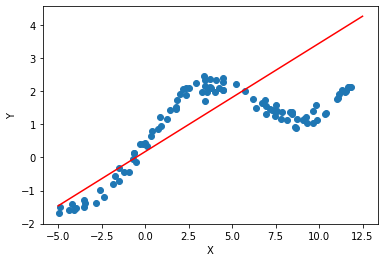

In [129]:
plt.scatter(df1_lwlr, df2_lwlr)
plt.xlabel("X")
plt.ylabel("Y")

# x from 0 to 30
x_seq = np.linspace(-5.0, 12.5, 50)
y_line = []
for i in x_seq:
    y_line.append(0.32767539 * i + 0.17531122)
plt.plot(x_seq, y_line, c = 'r')

plt.show()

### (d)

In [210]:
y = df2_lwlr.values
y.shape
XT = X.values.T
XT.shape
theta_w = np.linalg.inv(XT @ w @X.values) @ XT @ w @ y
theta_w

array([[0.39425856],
       [0.41566406]])

array([[0.38750031],
       [0.41637431]])

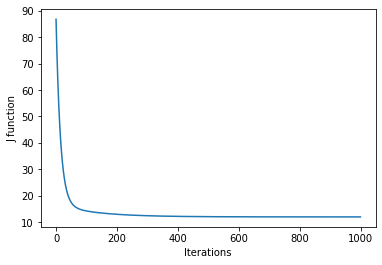

In [247]:
#Gradient Descent Method to check exact solution
alpha = 0.01 # learning rate
numiter = 1000
x_l = np.c_[np.ones(df1_lwlr.shape[0]), df1_lwlr]
theta = np.zeros((2, 1))
y
theta_history = []
j_function = []

w = np.zeros((100,100))
xxx = x_l[:,1]

def jfuntion(x, y, theta):
    j = (np.dot(x, theta) - y).T @ w @ (np.dot(x, theta) - y)
    return j


#DIAGONAL WEIGHT MATRIX
for i in range(len(y)):
    w[i][i] = np.exp(-((xxx[i])**2)/(20))

for i in range(numiter):
    error = np.dot(x_l, theta) - y
    weight_1 = np.dot(w, error)
    prepos = np.dot(w, x_l)
    delta = np.dot(prepos.T, error) / len(y)
#     print(jfuntion(x, y, theta))
    j_function.append(jfuntion(x, y, theta))
    theta = theta - alpha * delta
    theta_history.append(theta)

clean = []
for i in range(numiter):
    clean.append(j_function[i][0][0])

seq = [i for i in range(numiter)]
plt.plot(seq, clean)
plt.xlabel("Iterations")
plt.ylabel("J function")
theta_history[-1]    

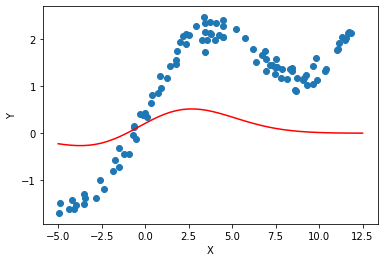

In [217]:
# J
plt.scatter(df1_lwlr, df2_lwlr)
plt.xlabel("X")
plt.ylabel("Y")

# x from 0 to 30
x_seq = np.linspace(-5.0, 12.5, 50)
y_line = []

def Helperfunction(beta_0, beta_1, i):
    return  (1/2) * np.exp(-(i) ** 2/(20)) * (beta_0 * i + beta_1)

for i in x_seq:
    y_line.append(Helperfunction(0.39425856, 0.41566406, i))
plt.plot(x_seq, y_line, c = 'r')

plt.show()